# Characteristics Red and White Portuguese "Vinho Verde" 

### Authors: Man Chong(Aaron) Chan, Nidia Bucarelli , Saavan Parikh


## Dataset Introduction and Objectives

People enjoy wine more and more, and the benefits of drinking wine have been well documented [1]. Some of the potential benefits include (1) reduced risk of heart disease [2]; (2) lowered risk of death from stroke [3]; (3) improved cholesterol levels [4]; (4) Reduced risk of neurodegenerative diseases [5-6]; and reduced risk of some cancers such as lung cancer [7]. Wines come in a large variety of styles and can be broadly distinctive based on structure, wine making methods, part of the grapes, and chemical components. Different type of wine variants may have specific benefits to the health (e.g., the making process of red wine provides beneficial plant compounds from which health benefits could be derived). Understanding wine properties could support wine selection towards improved health.  To this end, this project aims to conduct a clustering analysis of a dataset that contains chemical properties of red and white variants of wine to meet the following purposes:

-  **Understand and explore the chemical properties of potential groups of wines variants.**
-  **Understand and explore chemical components that best describe the red and white wine variants.**

This project merges the "red wine quality" dataset and the "white wine quality" dataset from [8]. After the merging, a dataset with 6497 variants of the Portuguese “vinho verde” is obtained (1599 objects of the red wine and 4898 objects from the white wine). Each object is described with an attribute to refer to the wine quality (score between 0 and 10) and the following 12 chemical properties:

- fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- citric acid: found in small quantities, citric acid can add ‘freshness’ and flavor to wines
- residual sugar: the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- chlorides: the amount of salt in the wine
- free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- density: the density of water is close to that of water depending on the percent alcohol and sugar content
- pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- alcohol: the percent alcohol content of the wine

Findings of this project could support research efforts seeking to understand health benefits of different type of wine variants based on chemical properties towards improved wine decision making. 


*References:*

[1]  Fehér J, Lengyel G, Lugasi A.(2005).  A bor kultúrtörténete, a borterápia elméleti háttere [Cultural history of wine, the theoretical background of wine therapy]. Orv Hetil. 

[2] Rimm Eric B, Klatsky Arthur, Grobbee Diederick, Stampfer Meir J. (1996). Review of moderate alcohol consumption and reduced risk of coronary heart disease: is the effect due to beer, wine, or spirits? BMJ ; 312 :731

[3] Grønbaek, M., Deis, A., Sørensen, T. I., Becker, U., Schnohr, P., & Jensen, G. (1995). Mortality associated with moderate intakes of wine, beer, or spirits. BMJ (Clinical research ed.), 310(6988), 1165–1169. https://doi.org/10.1136/bmj.310.6988.1165

[4] Bonnefont-Rousselot D. (2016). Resveratrol and Cardiovascular Diseases. Nutrients, 8(5), 250. https://doi.org/10.3390/nu8050250

[5] Vasanthi HR, Parameswari RP, DeLeiris J, Das DK. (2012). Health benefits of wine and alcohol from neuroprotection to heart health. Front Biosci (Elite Ed). 

[6] Panza F, Frisardi V, Seripa D, Logroscino G, Santamato A, Imbimbo BP, Scafato E, Pilotto A, Solfrizzi V. (2012). Alcohol consumption in mild cognitive impairment and dementia: harmful or neuroprotective? Int J Geriatr Psychiatry. 

[7] Athar, M., Back, J. H., Tang, X., Kim, K. H., Kopelovich, L., Bickers, D. R., & Kim, A. L. (2007). Resveratrol: a review of preclinical studies for human cancer prevention. Toxicology and applied pharmacology, 224(3), 274–283. https://doi.org/10.1016/j.taap.2006.12.025

[8] Cortez P., Cerdeira A., Almeida F., Matos T. and Reis J. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.




## Import of Library/Packages

In [1]:
import numpy as np
import pandas as pd
import sys
np.set_printoptions(threshold=sys.maxsize)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from pyclustertend import hopkins
from sklearn.neighbors import NearestNeighbors
import matplotlib.cm as cm
from sklearn.cluster import KMeans
from skfuzzy.cluster import cmeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.decomposition import NMF
from wNMF import wNMF
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.metrics import completeness_score
from sklearn.metrics import homogeneity_score

<ipython-input-1-e220fc0584b4>:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Part.1 Data Cleaning 

In [2]:
df_red=pd.read_csv('winequality-red.csv', ';')
df_white=pd.read_csv('winequality-white.csv', ';')
#We are reading both red/white wine csv files as pandas dataframes

In [3]:
df_red['class'] = 'red'
df_red.head()
#assign true label to the red wine dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.4            0.70              0.00         1.9             0.076       
1  7.8            0.88              0.00         2.6             0.098       
2  7.8            0.76              0.04         2.3             0.092       
3  11.2           0.28              0.56         1.9             0.075       
4  7.4            0.70              0.00         1.9             0.076       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  11.0                 34.0                  0.9978   3.51  0.56        
1  25.0                 67.0                  0.9968   3.20  0.68        
2  15.0                 54.0                  0.9970   3.26  0.65        
3  17.0                 60.0                  0.9980   3.16  0.58        
4  11.0                 34.0                  0.9978   3.51  0.56        

   alcohol  quality class  
0  9.4      5        red   
1  9.8      5        red   
2  9.8      5        red   
3  9.8      6        red   
4  9.4      5        red

In [4]:
df_white['class']= 'white'
df_white.head()
#assign true label to the white wine dataset

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  7.0            0.27              0.36         20.7            0.045       
1  6.3            0.30              0.34         1.6             0.049       
2  8.1            0.28              0.40         6.9             0.050       
3  7.2            0.23              0.32         8.5             0.058       
4  7.2            0.23              0.32         8.5             0.058       

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0  45.0                 170.0                 1.0010   3.00  0.45        
1  14.0                 132.0                 0.9940   3.30  0.49        
2  30.0                 97.0                  0.9951   3.26  0.44        
3  47.0                 186.0                 0.9956   3.19  0.40        
4  47.0                 186.0                 0.9956   3.19  0.40        

   alcohol  quality  class  
0  8.8      6        white  
1  9.5      6        white  
2  10.1     6        white  
3  9.9      6        white  
4  9.9      6        white

In [5]:
print (df_white.shape)
print (df_red.shape)
#seeing number of total rows and columns there are for both dataset, for later use. 

(4898, 13)
(1599, 13)


In [6]:
df = pd.concat([df_red, df_white], axis = 0)
#joining both datasets of red and white wine, for later use.

In [7]:
df.shape

(6497, 13)

In [8]:
df["quality"].unique()
#looking at how many metrics there are for the overall quality of both wines.

array([5, 6, 7, 4, 8, 3, 9])

In [9]:
df['quality_bin'] = pd.cut(df['quality'], [0,4,7,10], labels=['fair', 'mediocre', 'good'])
#Discretizing the column values into three buckets: fair, mediocre, and good based on the values given. 

## Part.2 Preliminary Exploratory Data Analysis (EDA)

#### There are 11 numerical attributes in total in this dataset, and there are 2 categorical variables we are using them as our labels.

###### numerical attributes:
- fixed acidity: measured in $g(tartaric\:acid)/dm^3$;
- volatile acidity: measured in $g(acetic\:acid)/dm^3$;
- citric acid: measured in $g/dm^3$;
- residual sugar: measured in $g/dm^3$;
- chlorides: measured in $g(sodium\:chloride)/dm^3$;
- free sulfur dioxide: measured in $mg/dm^3$;
- total sulfur dioxide: measured in $mg/dm^3$;
- density: measured in $mg/dm^3$;
- pH: ranges from (0, 14); 
- sulphates: measured in $g(potassium\:sulphate)/dm^3$;
- alcohol: measured in volume $\%$;



In [10]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count  6497.000000    6497.000000       6497.000000  6497.000000      
mean   7.215307       0.339666          0.318633     5.443235         
std    1.296434       0.164636          0.145318     4.757804         
min    3.800000       0.080000          0.000000     0.600000         
25%    6.400000       0.230000          0.250000     1.800000         
50%    7.000000       0.290000          0.310000     3.000000         
75%    7.700000       0.400000          0.390000     8.100000         
max    15.900000      1.580000          1.660000     65.800000        

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000  6497.000000          6497.000000           6497.000000   
mean   0.056034     30.525319            115.744574            0.994697      
std    0.035034     17.749400            56.521855             0.002999      
min    0.009000     1.000000             6.000000              0.987110      
25%    0.038000     17.000000            77.000000             0.992340      
50%    0.047000     29.000000            118.000000            0.994890      
75%    0.065000     41.000000            156.000000            0.996990      
max    0.611000     289.000000           440.000000            1.038980      

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean   3.218501     0.531268     10.491801    5.818378     
std    0.160787     0.148806     1.192712     0.873255     
min    2.720000     0.220000     8.000000     3.000000     
25%    3.110000     0.430000     9.500000     5.000000     
50%    3.210000     0.510000     10.300000    6.000000     
75%    3.320000     0.600000     11.300000    6.000000     
max    4.010000     2.000000     14.900000    9.000000

###### categorical attributes:
- class: red or white wine
- quality: 5, 6, 7, 4, 8, 3, 9
- quality_bin: fair, mediocre or good based on expert ratings

In [11]:
df['class'].value_counts()

white    4898
red      1599
Name: class, dtype: int64

In [12]:
df['quality'].value_counts()

6    2836
5    2138
7    1079
4    216 
8    193 
3    30  
9    5   
Name: quality, dtype: int64

In [13]:
df['quality_bin'].value_counts()

mediocre    6053
fair        246 
good        198 
Name: quality_bin, dtype: int64

###### Relationship between attributes:

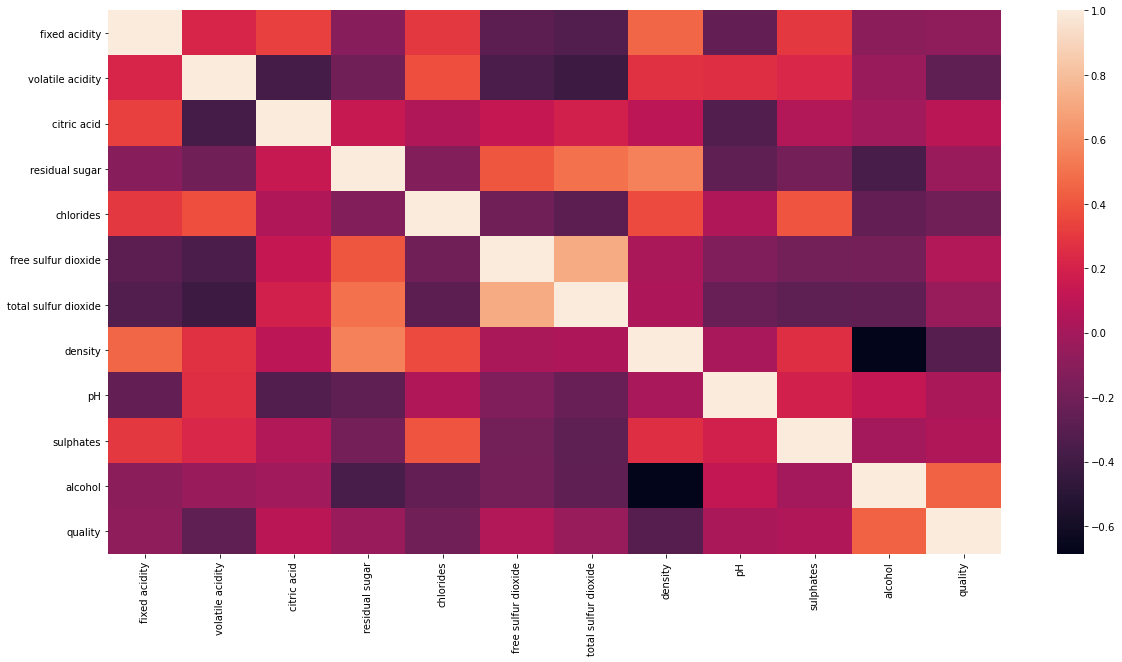

In [14]:
plt.figure(figsize=(20,10))
c= df.corr()
sns.heatmap(c)
plt.show()

####    Based on the correlation heatmap, there seem to exist a somewhat strong negative correlation between attribute pairs like 
*  density and alcohol; 
* citric acid and volatile acidity;
* total sulfur dioxide and volatile acidity. 
#### Meanwhile, a positive correlation between attribute pairs like
* density and fixed acidity;
* chlorides and volatile acidity;
* density and residual sugar;
* free sulfur dioxide and residual sugar;
* sulphates and chlorides.

#### These relationships can be confirmed loooking at the pairwise scatterplot below.

<Figure size 1440x720 with 0 Axes>

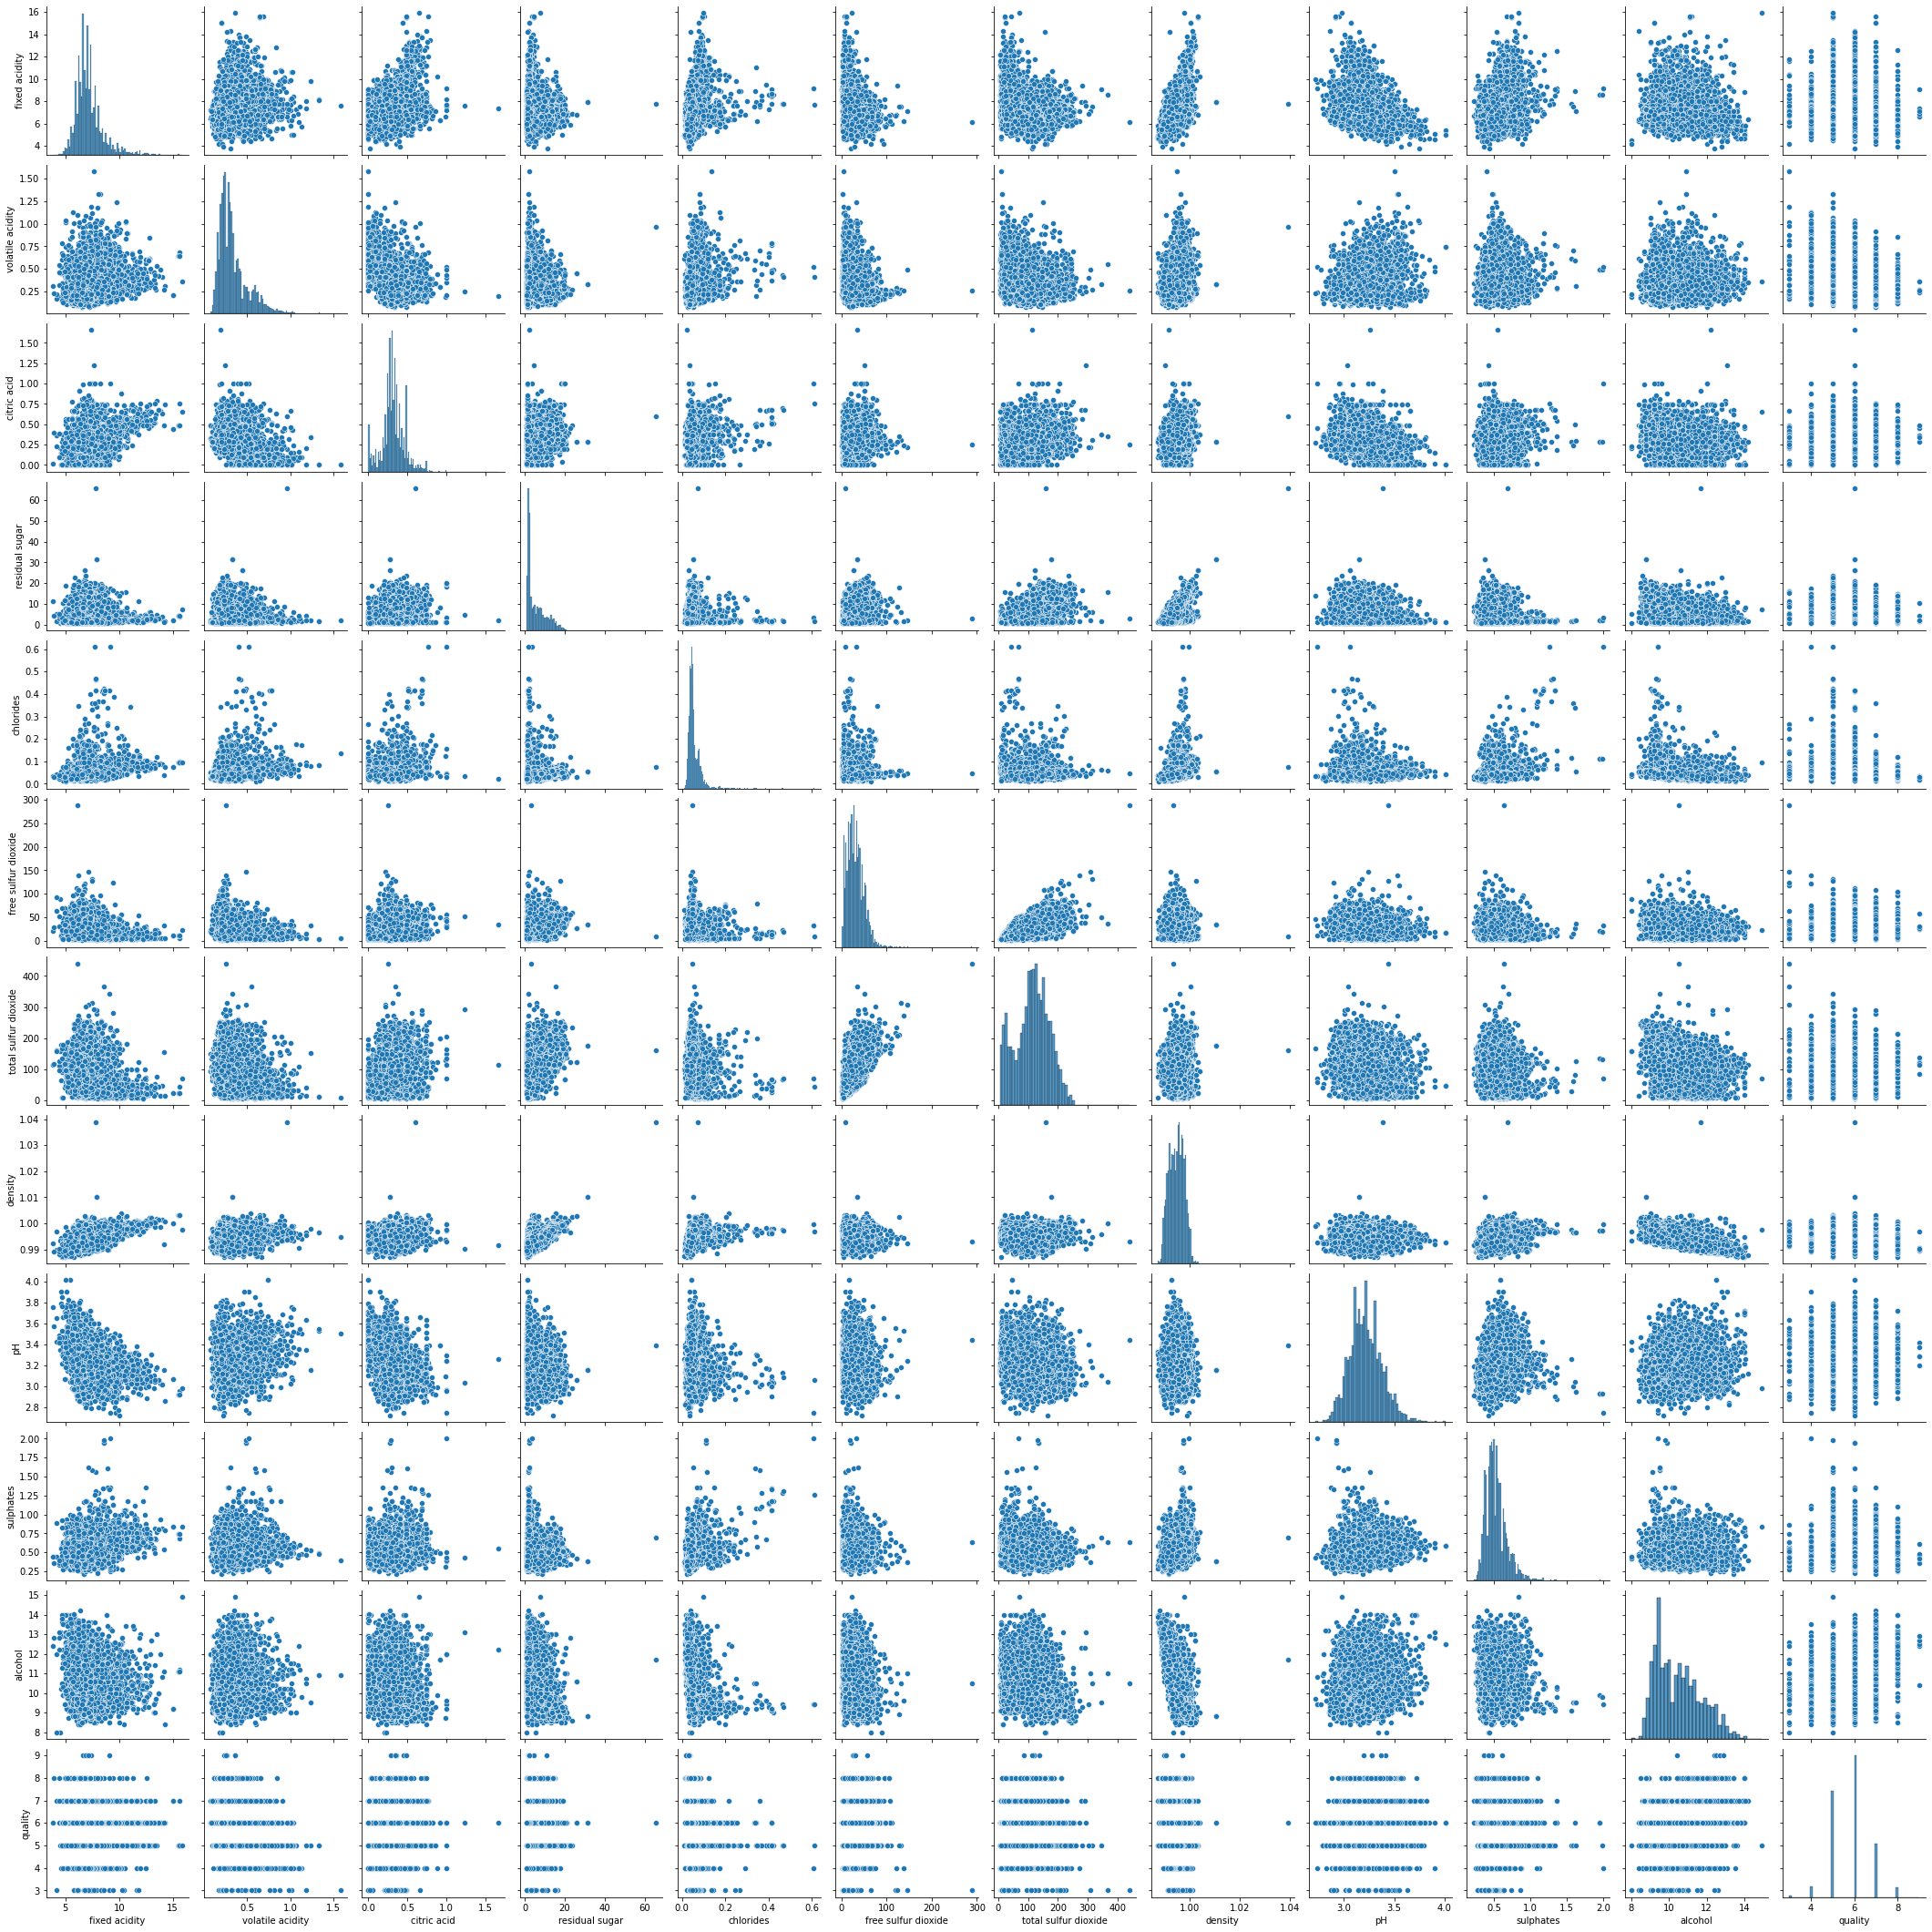

In [15]:
plt.figure(figsize=(20,10))
sns.pairplot(df)
plt.show()

#### After careful considerations, we ultimately decided to scale our data. This is because some of our attributes were measured in different units. For example, citric acid were measured in $𝑔/𝑑𝑚^3$, total sulfur dioxide were measured in  $m𝑔/𝑑𝑚^3$ and pH were on a scale from (0, 14). 
#### Since most of the unsupervised learning algorithms we learned use Eucledian distance to measure the similarity between data points, scaling would be essential to our data. 

keeping only the numerical variable for clustering

In [16]:
df_for_clustering = df.iloc[:, 0:11]

scaling

In [17]:
X = df_for_clustering
ss = StandardScaler()
scaledX = ss.fit_transform(df_for_clustering)
scaledX= pd.DataFrame(scaledX, columns= df_for_clustering.columns)

In [18]:
scaledX.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0  0.142473       2.188833         -2.192833    -0.744778        0.569958    
1  0.451036       3.282235         -2.192833    -0.597640        1.197975    
2  0.451036       2.553300         -1.917553    -0.660699        1.026697    
3  3.073817      -0.362438          1.661085    -0.744778        0.541412    
4  0.142473       2.188833         -2.192833    -0.744778        0.569958    

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0 -1.100140            -1.446359              1.034993  1.813090  0.193097    
1 -0.311320            -0.862469              0.701486 -0.115073  0.999579    
2 -0.874763            -1.092486              0.768188  0.258120  0.797958    
3 -0.762074            -0.986324              1.101694 -0.363868  0.327510    
4 -1.100140            -1.446359              1.034993  1.813090  0.193097    

    alcohol  
0 -0.915464  
1 -0.580068  
2 -0.580068  
3 -0.580068  
4 -0.915464

# Part.3 Pre-Analyis Question

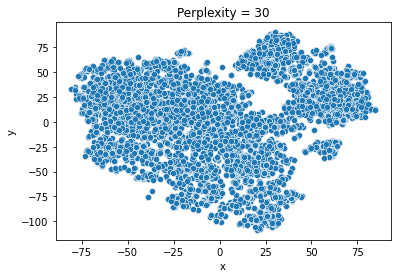

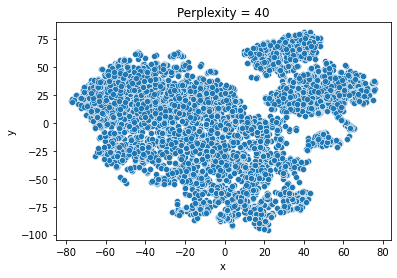

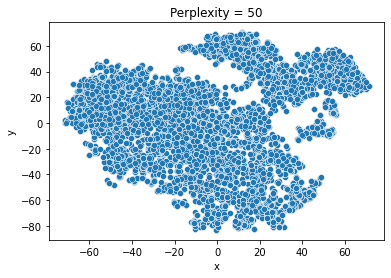

In [19]:
# Perform the TSNE non-linear dimensionality reduction
# for i in range(0,2):
perplexity = [30,40,50]
for p in perplexity:
    tsne = TSNE(n_components=2, perplexity=p, random_state= 1001)
    data_tsne = tsne.fit_transform(scaledX)

    # #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=X.index)
    dff = pd.concat([X, df_tsne], axis=1)

    # Plot the projected (x,y) coordinates
    sns.scatterplot(x='x', y='y', data=dff)
    plt.title('Perplexity = '+ str(p) )
    plt.show()

In [20]:
num_trials=5
hopkins_stats=[]
for i in range(0,num_trials):
    n = len(scaledX)
    p = int(0.1 * n)
    hopkins_stats.append(hopkins(scaledX,p))
print(hopkins_stats)

[0.045361798913042706, 0.04332576962071801, 0.04093718924065479, 0.04247796018865058, 0.04041588964134352]


The dataset seem to be clusterable. This is because when we increase the perplexity value of our data there seems to be an underlying clustering structure. Furthermore, when we evaluate the hopkins statistic the values range closer to 0 than 0.5. If they were closer to 0.5, then this would indicate that our data is less clusterable 


There are two complete clusters that emerge when creating the T-SNE plot. However, the structure is not spherical but rather solely clumped together into decipherable groups. They are not balanced in size as we have a cluster much larger than the other. Additionally, we see some overlap with our clusters as there is some noise connected in between the clusters and noise connected to one of the clusters as well. 

# Part.4 Algorithm Clustering Analysis

In [21]:
summary = df.copy()

# 4.1. K- Means and Fuzzy C-Means

**The T-sne plot from Part 3. showed dense areas of blobs with almost ellipsoidal shapes. Thus, the elbow method is used below to discover insights of the right number of clusters based on clusters inertia. According to this method, the number of clusters should be 3 or 4 (where the curve started leveling out).**

**We explored how the data could be clustered when using K-Means with K=4, and then for K=2 according to the pre-defined classes (Red wine and White wine). For both scenarios, results showed the clusters are not well separated, and some points seem to overlap with other clusters. To explore this uncertainty, the Fuzzy C-Means algorithm has been used to weight the membership of uncertain objects and compare the performance between both algorithms.**

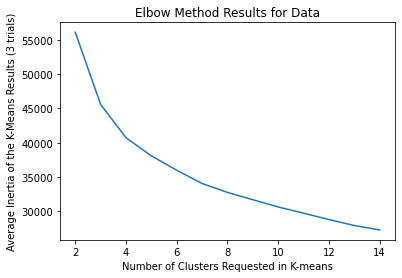

In [22]:
cluster_num_list=range(2,15)
avg_inertia_list=[]
for k in cluster_num_list:
    sub_inertia_list=[]
    for i in range(0,3):
        kmeans=KMeans(n_clusters=k).fit(scaledX)
        sub_inertia_list.append(kmeans.inertia_)
    avg_inertia_list.append(np.average(sub_inertia_list))

#Plot it    
plt.plot(cluster_num_list,avg_inertia_list)
plt.xlabel('Number of Clusters Requested in K-means')
plt.ylabel('Average Inertia of the K-Means Results (3 trials)')
plt.title('Elbow Method Results for Data')
plt.show()

According to the elbow method, the number of clusters should be 3 or 4 (where the curve started leveling out).
The following sections will explore how the data is being clustered when using K=4, and then when using K=2 for the pre-defined classes.

## Analysis for  K=4

*K-Means using K=4*:

In [23]:
kmeans=KMeans(n_clusters=4, random_state=1001).fit(scaledX)
summary['K_means4'] = kmeans.labels_

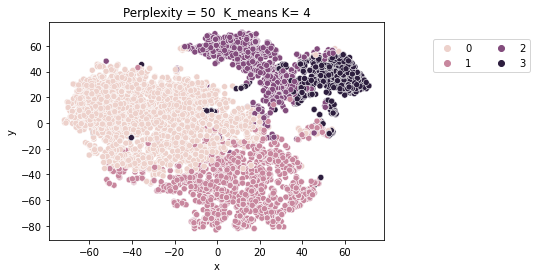

In [24]:
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue= 'K_means4', data=dff)
plt.title('Perplexity = '+ str(50) + '  K_means K= 4' )
plt.legend(loc= 'lower right', ncol= 2,bbox_to_anchor=(1.45, 0.75))
plt.show()

In [25]:
silhouette_avg = silhouette_score(scaledX, summary['K_means4'])
print (silhouette_avg)

0.24753742882754495


From the plot above, it can be seen clusters are not well separated, and some points seem to overlap with other clusters. This behavior is also evidenced by the average silhouette score. To explore this uncertainty and clustering improvement, the Fuzzy C-Means algorithm is also tested.

Below we are going to perform Fuzzy C-Means to explore the dataset behavior when using K=4.

For the Fuzzy C-means, the following parameters are selected:

- learning rate, m= 1.4;
- maximum number of iterations, maxiter= 20,000;

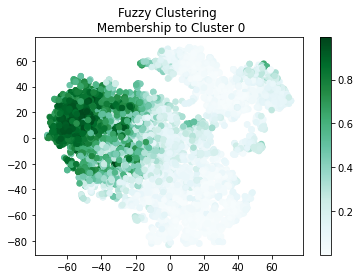

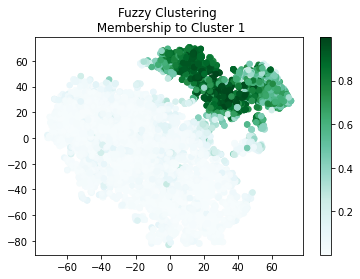

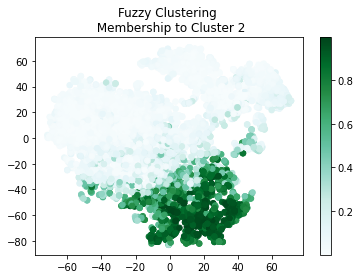

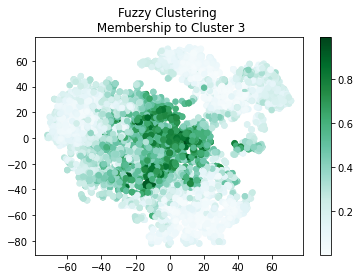

In [26]:
p=1.4
K=4
X_array = np.asarray(scaledX).T
cntr, W, _, _, _, _, pc = cmeans(X_array, c=K, m=p, error=1e-6, maxiter=20000)
for i in range(0,K):
    
    #Create a column with cluster i membership scores
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=scaledX.index)
    summary['C-means Cluster %s Membership Score'%str(i)]=W[i,:]
    dff = pd.concat([scaledX, df_tsne], axis=1)

    
    #Plot the points, color coded by the membership score.
    points = plt.scatter(dff["x"], dff["y"],
                 c=summary['C-means Cluster %s Membership Score'%str(i)],s=30, cmap="BuGn")
    plt.colorbar(points)
    
    #Plots the centroids as well.
    # plt.scatter(cntr[i][0],cntr[i][1], marker="x", color='orange')        
    plt.title('Fuzzy Clustering \n Membership to Cluster %s'%str(i))
#     plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [27]:
pc

0.6101722852137788

The Dunn's partitioning coefficient of 0.61 is lower than 1. This indicates the underlying dataset might be inherently fuzzy.

To analyze the Fuzzy C-means results, a hard partition is created by assigning each object to the cluster that it most belongs to using the weights obtained from the C-means clustering results.

In [28]:
inner= np.argmax(W, axis=0)
summary['C-means_hardpartitions_K4'] = inner

In [29]:
silhouette_avg = silhouette_score(scaledX, summary['C-means_hardpartitions_K4'])
print (silhouette_avg)

0.15500416529827227


**By comparisson of the silhouette scores, the K-means algorithm has a higher cohesion. Thus, the post analysis when clustering the data with K=4 is carried out with the results from the K-means algorithm.**

## Post-Analysis Questions for  K=4

**Cluster Cohesion:**

In [30]:
silhouette_avg = silhouette_score(scaledX, summary['K_means4'])
print (silhouette_avg)

0.24753742882754495


In [31]:
sample_silhouette_values = silhouette_samples(scaledX, summary['K_means4'])
summary['sample_silhouette_values_Kmeans_k4']= sample_silhouette_values

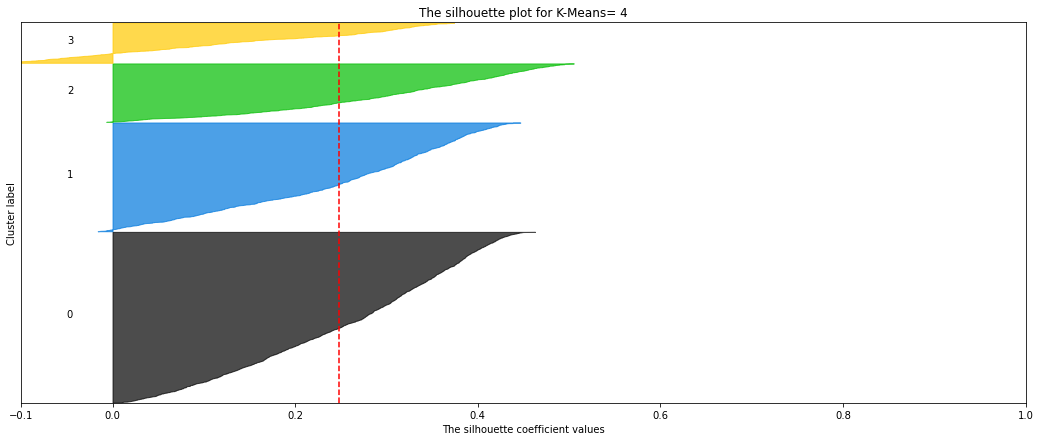

In [32]:
y_lower = 10
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    
n_clusters=len(np.unique(summary['K_means4']))
ith_cluster_silhouette_values = summary['sample_silhouette_values_Kmeans_k4']

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
y_lower =10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[summary['K_means4'] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for K-Means= 4")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

The Silhouette coefficient values indicated a poor separation and cohesion. All silhouette values are below ~0.55. From this Silhouette diagrama:

- On average, Cluster 3 has the lowest cohesion.
- On average, Cluster 2 has the highest cohesion. 

Objects with poor cohesion (e.g., objects with silhouette score lower than 0) are printed below.

In [33]:
poor_ = summary[summary['sample_silhouette_values_Kmeans_k4']<0]
rslt_df = poor_.sort_values(by = 'sample_silhouette_values_Kmeans_k4') 
points_poor= rslt_df.index.tolist()
len(points_poor)

209

In [34]:
rslt_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
540   9.2            0.590             0.24         3.30            0.101       
1227  9.0            0.580             0.25         2.00            0.104       
190   8.2            0.500             0.35         2.90            0.077       
321   9.3            0.610             0.26         3.40            0.090       
220   7.8            0.340             0.37         2.00            0.082       
711   8.9            0.565             0.34         3.00            0.093       
721   8.9            0.480             0.24         2.85            0.094       
1039  8.9            0.500             0.21         2.20            0.088       
1042  8.9            0.500             0.21         2.20            0.088       
648   8.7            0.480             0.30         2.80            0.066       
1225  9.2            0.460             0.23         2.60            0.091       
37    8.1            0.380             0.28         2.10            0.066       
816   9.8            0.510             0.19         3.20            0.081       
475   9.6            0.680             0.24         2.20            0.087       
478   9.6            0.680             0.24         2.20            0.087       
3849  8.2            0.310             0.43         7.00            0.047       
738   9.0            0.460             0.23         2.80            0.092       
316   9.6            0.560             0.23         3.40            0.102       
694   9.0            0.470             0.31         2.70            0.084       
1306  9.7            0.690             0.32         2.50            0.088       
1308  9.7            0.690             0.32         2.50            0.088       
655   9.7            0.550             0.17         2.90            0.087       
40    7.3            0.450             0.36         5.90            0.074       
39    7.3            0.450             0.36         5.90            0.074       
576   9.9            0.500             0.24         2.30            0.103       
693   9.0            0.480             0.32         2.80            0.084       
414   8.8            0.520             0.34         2.70            0.087       
1593  8.6            0.160             0.49         7.30            0.043       
1125  8.8            0.240             0.35         1.70            0.055       
3220  9.0            0.380             0.53         2.10            0.102       
1201  7.9            0.340             0.36         1.90            0.065       
746   8.2            0.340             0.38         2.50            0.080       
312   9.0            0.460             0.31         2.80            0.093       
622   10.0           0.580             0.22         1.90            0.080       
27    7.9            0.430             0.21         1.60            0.106       
22    7.9            0.430             0.21         1.60            0.106       
1561  9.1            0.280             0.49         2.00            0.059       
1564  9.1            0.280             0.49         2.00            0.059       
3186  8.7            0.300             0.59         1.70            0.046       
1843  8.3            0.280             0.45         7.80            0.059       
186   7.4            0.390             0.48         2.00            0.082       
567   8.7            0.700             0.24         2.50            0.226       
566   8.7            0.700             0.24         2.50            0.226       
84    6.3            0.300             0.48         1.80            0.069       
536   9.9            0.630             0.24         2.40            0.077       
529   9.9            0.630             0.24         2.40            0.077       
456   8.9            0.590             0.39         2.30            0.095       
428   9.1            0.520             0.33         1.30            0.070       
410   9.0            0.430           

In [35]:
rslt_df.groupby(['class']).count().iloc[:,0]

class
red      130
white    79 
Name: fixed acidity, dtype: int64

- When using K-means with K=4, the number of objects with a silhouette below 0 is 210. 
- From these objects, 130 objects belong to the class of "red Wine".
- From these objects, 80 objects belong to the class of "white Wine".

**Cluster Attributes**

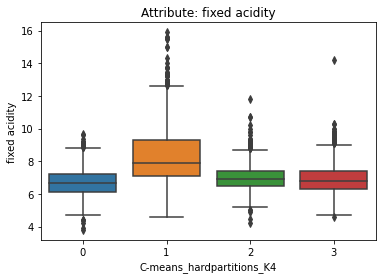

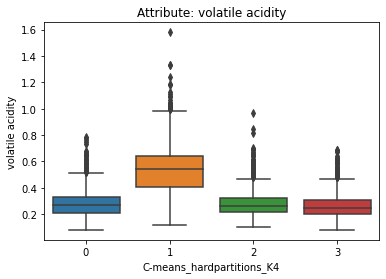

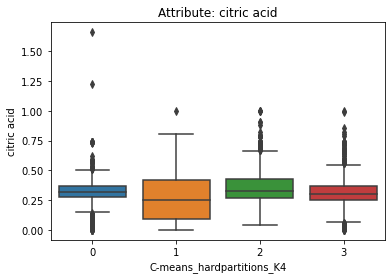

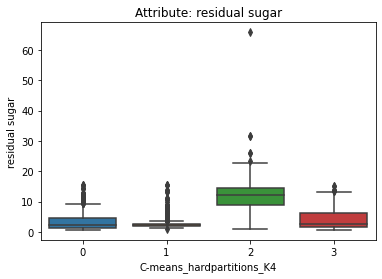

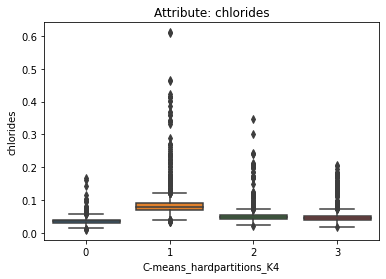

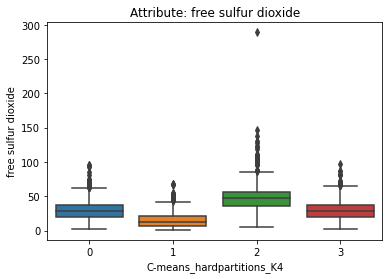

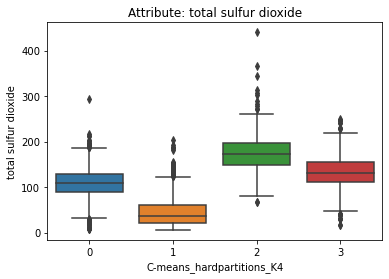

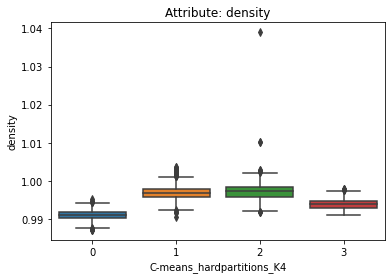

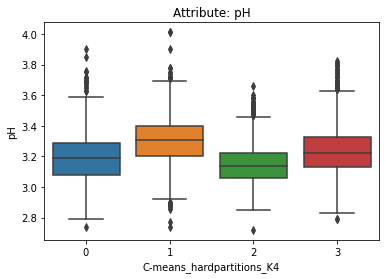

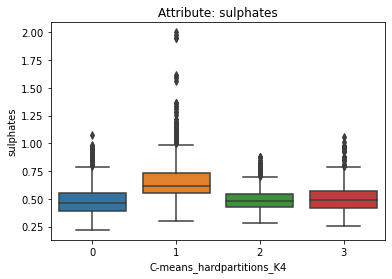

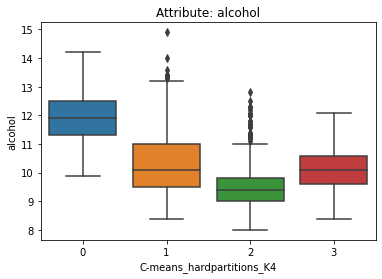

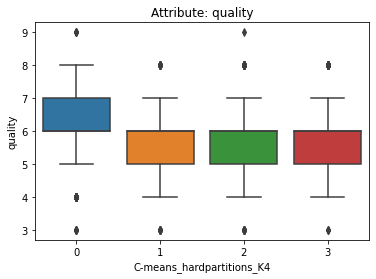

In [36]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
  sns.boxplot(x="C-means_hardpartitions_K4", y=col, data=summary)
  plt.title('Attribute: %s' %col)
  plt.ylabel(col)
  plt.show()

The boxplots from above suggests the followings:

**Cluster 0:**
- It is characterized by the type of wine with the highest concentration of residual sugar and both the free and the total sulfur dioxide.
- It is characterized by the type of wine with the lowest alcohol level.

**Cluster 1:**
- It is characterized by the type of wine with the highest quality, and the highest concentration of alcohol.
- It clusters the type of wines with the lowest density. 

**Cluster 2:**
- It is characterized by the type of wine with the highest pH, and the highest concentration of fixed acidity, volatile acidity, chlorides, and sulphates.
- It clusters the type of wines with the lowest free and total sulfure dioxide.

**Cluster 3:**
- It is catheterized by the type of wine with low density, and low chlorides.


## Analysis for K=2

In [37]:
kmeans=KMeans(n_clusters=2, random_state=1001).fit(scaledX)
summary['K_means2'] = kmeans.labels_

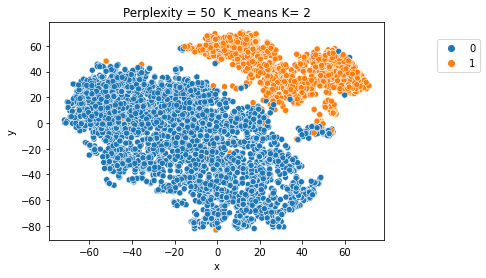

In [38]:
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue= 'K_means2', data=dff)
plt.title('Perplexity = '+ str(50) + '  K_means K= 2' )
plt.legend(loc= 'lower right', ncol= 1,bbox_to_anchor=(1.30, 0.75))
plt.show()

In [39]:
silhouette_avg = silhouette_score(scaledX, summary['K_means2'])
print (silhouette_avg)

0.2764763072583309


Similar to the analysis of K-means with K=4, this plot indicates some objects have some overalap with other clusters. This behavior is also evidenced by the average silhouette score. To explore this uncertainty and clustering improvement, the Fuzzy C-Means algorithm is also tested.

In this section we are going to perform C-Means to explore the dataset behavior when using K=2.

For Fuzzy C-means, the following parameters are selected:

- learning rate, m= 1.3
- maximum number of iterations, maxiter= 20,000

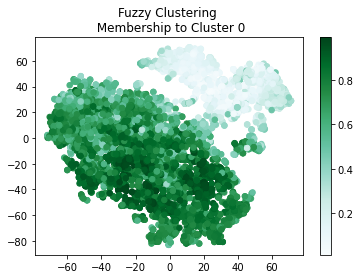

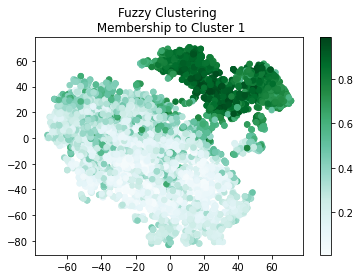

In [40]:
p=1.5
K=2
X_array = np.asarray(scaledX).T
cntr, W, _, _, _, _, pc = cmeans(X_array, c=K, m=p, error=1e-6, maxiter=20000)
for i in range(0,K):
    
    #Create a column with cluster i membership scores
    df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=scaledX.index)
    summary['C-means Cluster %s Membership Score_K2_'%str(i)]=W[i,:]
    dff = pd.concat([scaledX, df_tsne], axis=1)

    
    #Plot the points, color coded by the membership score.
    points = plt.scatter(dff["x"], dff["y"],
                 c=summary['C-means Cluster %s Membership Score_K2_'%str(i)],s=30, cmap="BuGn")
    plt.colorbar(points)
    
    #Plots the centroids as well.
    # plt.scatter(cntr[i][0],cntr[i][1], marker="x", color='orange')        
    plt.title('Fuzzy Clustering \n Membership to Cluster %s'%str(i))
#     plt.legend(bbox_to_anchor=(1,1))
    plt.show()

In [41]:
pc

0.6849892110573272

The Dunn's partitioning coefficient of 0.6850 is lower than 1. This indicates the underlying dataset might have some fuzziness.

To analyze the performance of Fuzzy C-means, a hard partition is created by assigning each object to the cluster that it most belongs to using the weights obtained from the C-means clustering results.

In [42]:
inner= np.argmax(W, axis=0)
summary['C-means_hardpartitions_K2'] = inner

In [43]:
sample_silhouette_values = silhouette_samples(scaledX, summary['C-means_hardpartitions_K2'])
summary['sample_silhouette_values_Cmeans_k2']= sample_silhouette_values


In [44]:
silhouette_avg = silhouette_score(scaledX, summary['C-means_hardpartitions_K2'])
summary['silhouette_K2']= silhouette_avg
print (silhouette_avg)

0.24839401004229744


**By comparisson of the silhouette scores, the K-means algorithm has a higher cohesion. Thus, the post analysis when clustering the data with K=2 is carried out with the results from the K-means algorithm.**

## Post-Analysis Questions for K=2

In [45]:
sample_silhouette_values = silhouette_samples(scaledX, summary['K_means2'])
summary['sample_silhouette_values_Kmeans_k2']= sample_silhouette_values

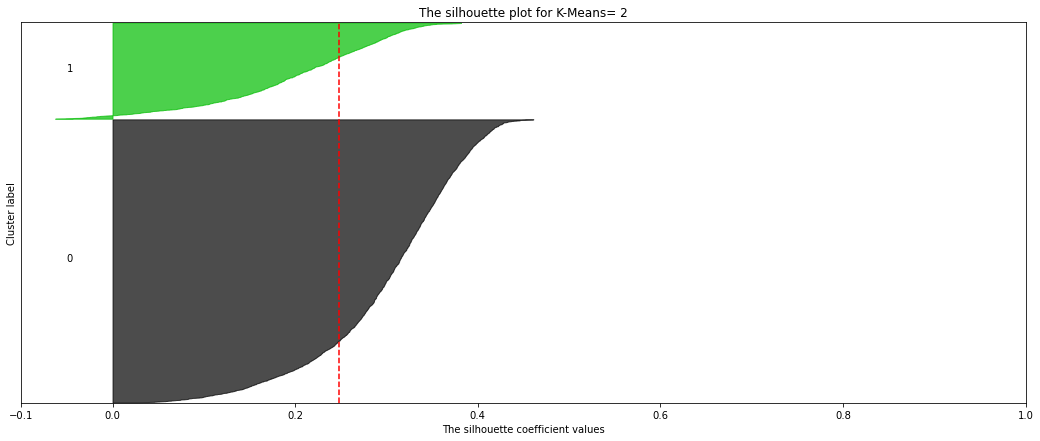

In [46]:
y_lower = 10
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    
n_clusters=len(np.unique(summary['K_means2']))
ith_cluster_silhouette_values = summary['sample_silhouette_values_Kmeans_k2']

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
y_lower =10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[summary['K_means2'] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for K-Means= 2")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

**The Silhouette coefficient values indicated a poor separation and cohesion. All silhouette values are below ~0.50. From this diagram we can state cluster 0 has a lower cohesion than cluster 1.** 

Objects with poor cohesion (e.g., objects with silhouette score lower than 0) are printed below.

In [47]:
# rslt_df = cohesion_summary.sort_values(by = 'sample_silhouette_values_Kmeans_k2') 
poor_ = summary[summary['sample_silhouette_values_Kmeans_k2']<0]
rslt_df = poor_.sort_values(by = 'sample_silhouette_values_Kmeans_k2') 
points_poor= rslt_df.index.tolist()
len(poor_)

61

In [48]:
rslt_df

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
2642  7.6            0.230             0.40         5.2             0.066       
401   7.7            0.260             0.30         1.7             0.059       
2373  7.6            0.480             0.37         1.2             0.034       
1272  7.0            0.390             0.31         5.3             0.169       
1044  6.4            0.390             0.33         3.3             0.046       
90    7.9            0.520             0.26         1.9             0.079       
2849  7.7            0.430             0.37         10.0            0.169       
506   7.3            0.510             0.26         3.3             0.090       
1708  7.0            0.610             0.26         1.7             0.051       
2424  6.2            0.440             0.18         7.7             0.096       
2422  6.2            0.440             0.18         7.7             0.096       
729   6.0            0.330             0.27         0.8             0.185       
523   9.3            0.400             0.49         2.5             0.085       
1168  6.5            0.340             0.27         2.8             0.067       
1028  7.2            0.340             0.21         2.5             0.075       
1217  8.2            0.340             0.37         1.9             0.057       
154   8.2            0.230             0.40         7.5             0.049       
2024  8.0            0.430             0.40         12.4            0.168       
662   7.0            0.570             0.10         8.3             0.094       
2490  7.7            0.390             0.49         7.7             0.036       
454   7.0            0.230             0.40         1.6             0.063       
53    8.6            0.380             0.36         3.0             0.081       
1386  5.6            0.490             0.13         4.5             0.039       
1394  5.6            0.490             0.13         4.5             0.039       
1085  6.8            0.480             0.08         1.8             0.074       
1126  5.8            0.290             0.26         1.7             0.063       
626   7.6            0.560             0.12         10.4            0.096       
1926  6.3            0.220             0.57         1.4             0.208       
1036  7.6            0.310             0.34         2.5             0.082       
830   7.3            0.205             0.31         1.7             0.060       
834   7.3            0.205             0.31         1.7             0.060       
2589  7.2            0.615             0.10         1.4             0.068       
2162  9.9            0.490             0.23         2.4             0.087       
1932  9.2            0.710             0.23         6.2             0.042       
1198  7.7            0.260             0.26         2.0             0.052       
1583  6.2            0.460             0.29         2.1             0.074       
2594  5.4            0.500             0.13         5.0             0.028       
1598  6.0            0.310             0.47         3.6             0.067       
230   6.8            0.640             0.08         9.7             0.062       
3972  6.8            0.370             0.67         1.5             0.175       
156   7.1            0.430             0.42         5.5             0.070       
154   7.1            0.430             0.42         5.5             0.070       
4316  7.2            0.585             0.20         10.4            0.086       
1835  8.0            0.550             0.42         12.6            0.211       
155   7.1            0.430             0.42         5.5             0.071       
157   7.1            0.430             0.42         5.5             0.071       
1577  7.1            0.640             0.49         1.8             0.050       
497   7.2            0.340             0.32         2.5             0.090       
1037  7.1            0.470           

In [49]:
rslt_df.groupby(['class']).count().iloc[:,12]

class
red      27
white    34
Name: quality_bin, dtype: int64

The following t-sne plot illustrates the 10 objects with the lowest silhouette values.

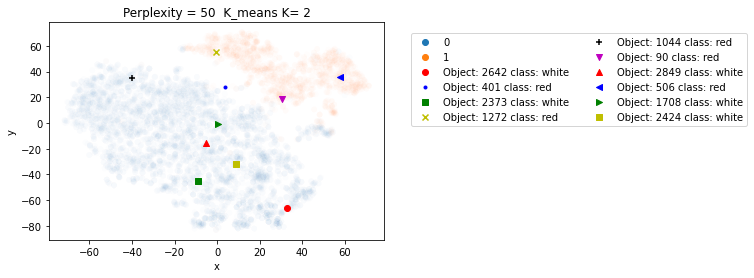

In [50]:
import itertools
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue= 'K_means2', alpha= 0.01, data=dff)
plt.title('Perplexity = '+ str(50) + '  K_means K= 2' )

colors = itertools.cycle(["r", "b", "g", 'y', 'k', 'm'])
markers = itertools.cycle(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'])
for i in range(0,10):
        pos = points_poor[i]
        name = "Object: " + str(points_poor[i]) + ' class: ' +str(dff.iloc[pos]['class']) 
        plt.scatter(dff.iloc[pos]["x"], dff.iloc[pos]["y"], marker=next(markers), color=next(colors),label=name)
        plt.legend(loc= 'lower right', ncol= 2,bbox_to_anchor=(2.1, 0.5))
plt.show()


- When using K-means with K=2, the number of objects with a silhouette below 0 is 60. 
- From these objects, 27 objects belong to the class of "red wine".
- From these objects, 33 objects belong to the class of "white wine".

**Cluster Attributes**

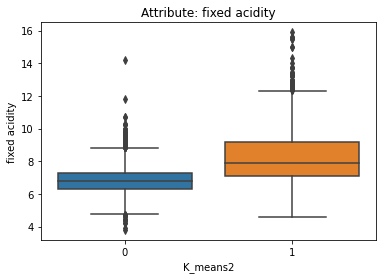

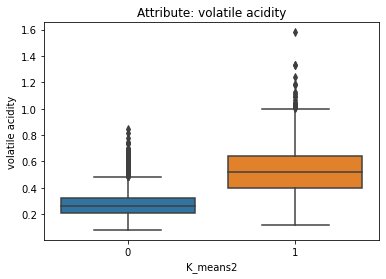

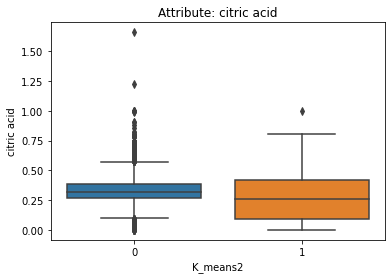

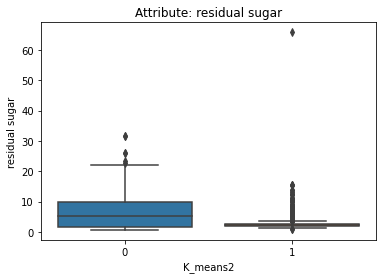

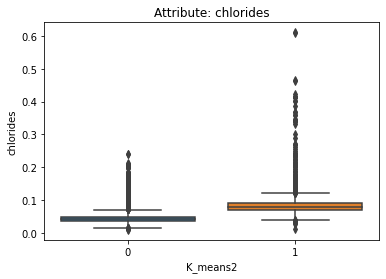

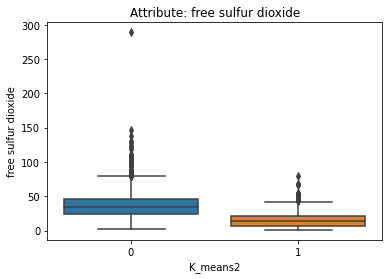

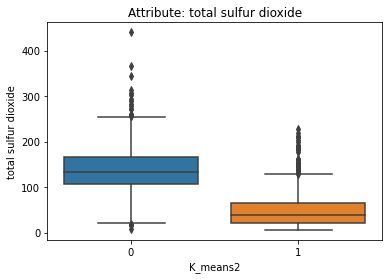

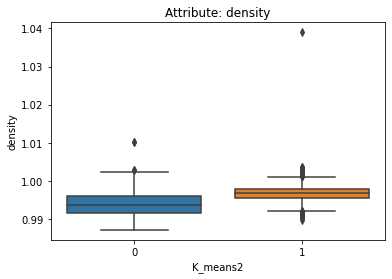

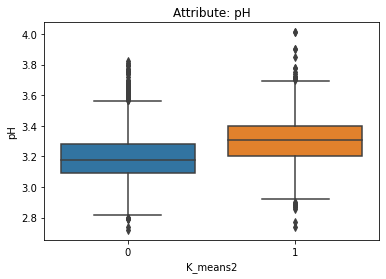

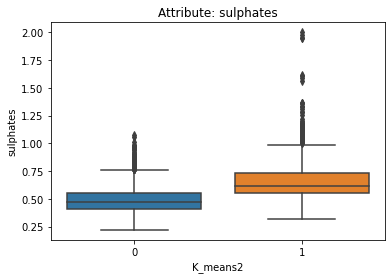

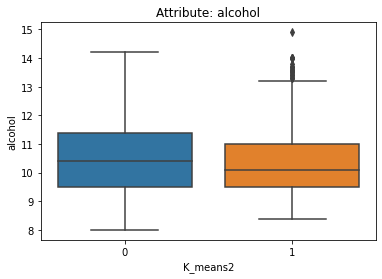

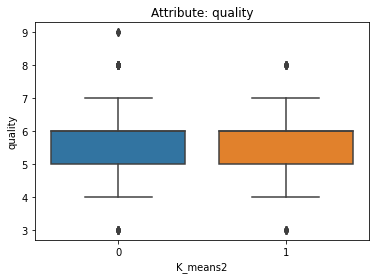

In [51]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
  sns.boxplot(x='K_means2', y=col, data=summary)
  plt.title('Attribute: %s' %col)
  plt.ylabel(col)
  plt.show()

From these plots:
- The cluster 0 is the group of wines with high "residual sugar". It is also the group of wines with low "sulphates", "pH", "density", "chlorides", and "acidity" concentration. 

- The cluster 1 is the group of wines with high "acidity" and "sulphate" concentration. It is also the group of wines with low "total sulfur dioxide" and "free sulfur dioxide" concentration.

- The group of wines from the cluster 1 has slightly higher alcohol concentration than the ones from the cluster 0.
- The quality between cluster 0 and cluster 1 is found to be similar.



**Supervised Learning Evaluation**

##### Next, we are evaluating K- means class labels by looking at adjusted rand score, completeness score and homogeneity score.

In [52]:
adjusted_rand_score(summary['class'], summary['K_means2'])

0.9397686280003548

In [53]:
completeness_score(summary['class'], summary['K_means2'])

0.8674243491080861

In [54]:
homogeneity_score(summary['class'], summary['K_means2'])

0.8792772661160896

K-means reported a high adjusted rand score, and a good completeness score and homogeneity score. The reported adjusted rand score is quite close to 1, which means that the K-means class labels agree with the true label with a high percentage. It reported a completeness score of 0.87, which means most objects with the same true label were assigned to the same K-means class. Finally, the homogeneity score was 0.88, meaning that most of the objects in the same K-means class have the same true class label.

##### Now, we look at the t-SNE plot color-coded with K-means labels and marker-styled with true label.

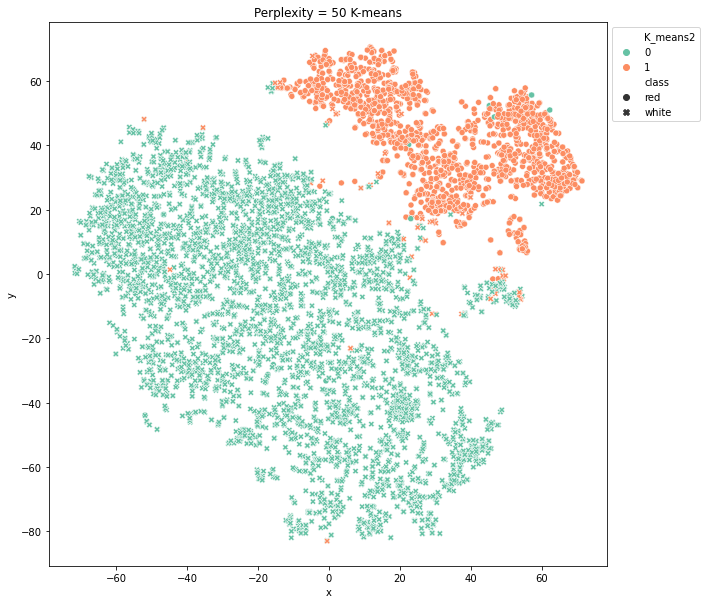

In [55]:
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)
plt.subplots(figsize=(10, 10))
sns.scatterplot(x='x', y='y', style= 'class', palette=sns.color_palette("Set2", 2), hue= 'K_means2', data=dff)
plt.title('Perplexity = '+ str(50) + ' K-means' )
plt.legend(bbox_to_anchor=(1,1), ncol= 1)
plt.show()

The plot above corroborates the reported adjusted rand score, completeness score and homogeneity score. Most of the K-means labels agree with the true label, and the clusters are showing high level of completeness and homogeneity.

# 4.2. Nonnegative Matrix Factorization (NMF)

#### Since there are 11 attributes in this data, and each attribute represents one characteristic of the wine, we are curious about what are the salient characteristics of each wine cluster. We chose to run NMF on this data due to its part based representation and ease of interpretability. It provides a membership score for each of the objects, and most importantly, the most significant attributes of each cluster.


##### The "l1_ratio" in NMF() controls the type of regularization used.
We used l1_ratio=1, which indicates L1 regularization, for sparsity.
##### The "alpha" in NMF() controls the magnitude of the regularization. 
We chose mulitple alpha (0, 0.6, 1, 5) for our Elbow Method Plot, and it seem that alpha does not have a big impact on number of clusters suggested.
##### We also try multiple random_state (1000, 88, 14, 82, 600), and the reconstruction error seem very stable. The difference between average reconstruction error with different random_state is negligible.

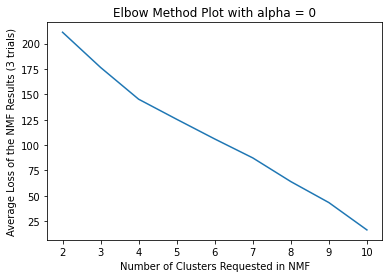

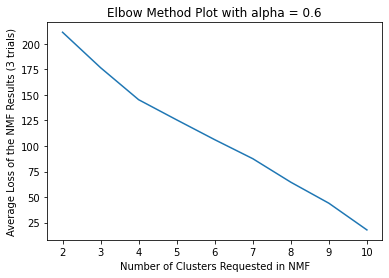

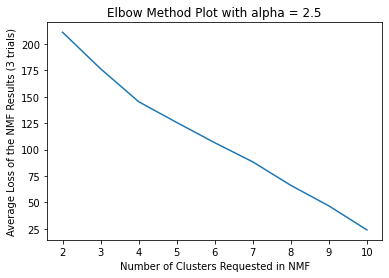

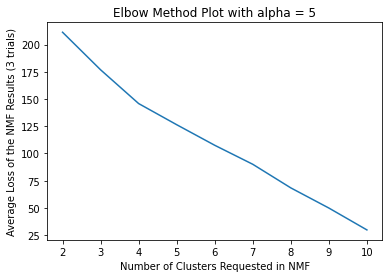

In [56]:
for j in [0, 0.6, 2.5, 5]:
    cluster_num_list=range(2,11)
    avg_loss_list=[]

    for k in cluster_num_list:
        sub_loss_list=[]
        for i in range(0,3):
            nmf = NMF(n_components=k, alpha=j, random_state = 1000)
            W = nmf.fit_transform(scaledX - scaledX.to_numpy().min())
            sub_loss_list.append(nmf.reconstruction_err_)
        avg_loss_list.append(np.average(sub_loss_list))

    plt.plot(cluster_num_list,avg_loss_list)
    plt.xlabel('Number of Clusters Requested in NMF')
    plt.ylabel('Average Loss of the NMF Results (3 trials)')
    plt.title('Elbow Method Plot with alpha = ' + str(j))
    plt.show()

##### There is no significant elbow but there exists a small elbow at k = 4. We picked k = 4 as our initial number of clusters.

### NMF with k = 4

In [57]:
nmf = NMF(n_components = 4, alpha = 2.5, l1_ratio = 1, random_state = 78)
W = nmf.fit_transform(scaledX - scaledX.to_numpy().min())
H = nmf.components_


In [58]:
pd.DataFrame(H.T, index = scaledX.columns, columns=['cluster 0', 'cluster 1', 'cluster 2', 'cluster 3'])

cluster 0  cluster 1  cluster 2  cluster 3
fixed acidity         34.669002  11.698893  0.000000   33.075627
volatile acidity      43.266718  4.250177   26.755344  4.518582 
citric acid           10.796176  27.609118  0.000000   34.837899
residual sugar        24.466137  39.373822  4.241982   0.000000 
chlorides             42.638414  10.011484  11.333417  14.839511
free sulfur dioxide   9.095056   40.523128  16.028574  0.416524 
total sulfur dioxide  8.436930   43.395416  12.789645  0.446136 
density               47.760969  23.886086  0.000000   3.643433 
pH                    26.228969  8.246724   40.987720  0.000000 
sulphates             33.727457  7.983299   17.800263  19.554197
alcohol               0.000000   9.359276   38.388238  26.879795

##### Since there are only 2 classes in the true label, these 4 clusters we are seeing are actually sub clusters of different wine classes.

##### Most significant attributes of each potential clusters:
- cluster 0: fixed acidity, volatile acidity, residual sugar, chlorides, density, pH, sulphates.
- cluster 1: citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, density.
- cluster 2: volatile acidity, free sulfur dioxide, total sulfur dioxide, pH, alcohol.
- cluster 3: fixed acidity, citric acid, residual sugar, sulphates, alcohol.

##### membership matrix k = 4

In [59]:
scaled_W=[list(W[i]/np.sum(W,axis=1)[i]) for i in range(0,len(W))]
scaled_W = pd.DataFrame(scaled_W)
scaled_W.rename(columns = {0:"NMFcluster0",1:"NMFcluster1",2:"NMFcluster2",3:"NMFcluster3"}, inplace = True)
scaled_W.set_index(df.index, inplace = True)
scaled_W.head()

NMFcluster0  NMFcluster1  NMFcluster2  NMFcluster3
0  0.555651     0.035074     0.409275     0.000000   
1  0.541194     0.083219     0.332616     0.042970   
2  0.529175     0.067009     0.322650     0.081166   
3  0.306847     0.198706     0.009864     0.484583   
4  0.555651     0.035074     0.409275     0.000000

In [60]:
tsne = TSNE(n_components=2, perplexity=50, random_state= 1001)
data_tsne = tsne.fit_transform(scaledX)

# #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
NMF_TSNE = pd.concat([df, df_tsne, scaled_W], axis=1)

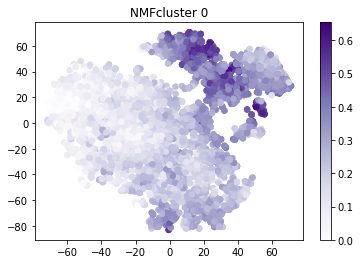

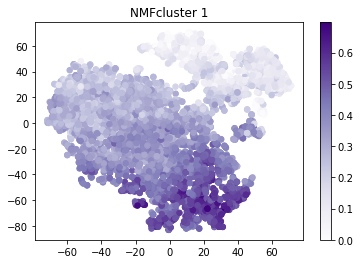

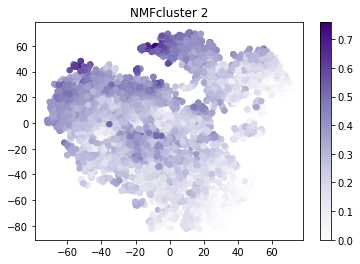

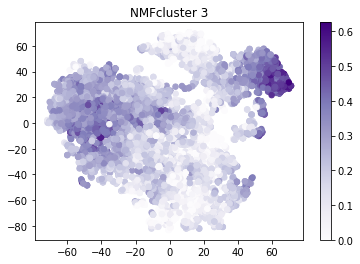

In [61]:
for i in range(0,4):
    points = plt.scatter(NMF_TSNE["x"], NMF_TSNE["y"], c=NMF_TSNE['NMFcluster%s' %str(i)], s=30, cmap="Purples")
    plt.colorbar(points)
    plt.title('NMFcluster %i'%i )
    plt.show()

 As we can see from above, it seems that the clusters of NMF with k = 4 are not clearly defined: most of them have relatively low membership score even when they were assigned to that cluster. It corroborates the elbow plot above; The lack of a stark elbow in the elbow plot shows that extra k after k = 2 does not provide much extra information about the clustering. As a result, we are running NMF with k = 2 just as the true label suggested. 

### NMF with k = 2

we picked l1_ratio = 1 to use L1 regularization and picked alpha = 10 for more penalty, which would help get a more sparse model.

In [62]:
nmf = NMF(n_components = 2, alpha = 10, l1_ratio = 1, random_state = 78)
W = nmf.fit_transform(scaledX - scaledX.to_numpy().min())
H = nmf.components_


In [63]:
pd.DataFrame(H.T, index = scaledX.columns, columns=['cluster 0', 'cluster 1'])

cluster 0  cluster 1
fixed acidity         45.082378  0.000000 
volatile acidity      45.187049  0.000000 
citric acid           34.200762  24.616721
residual sugar        25.816782  43.979363
chlorides             45.176650  0.000000 
free sulfur dioxide   24.146622  47.384294
total sulfur dioxide  22.350652  51.206760
density               37.407726  18.422282
pH                    44.587447  0.000000 
sulphates             45.335413  0.000000 
alcohol               43.157213  2.024392

##### Most significant attributes of each clusters:
- cluster 0: objects in cluster 1 are highly associated with all attributes.
- cluster 1: citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, density.


##### membership matrix k = 2

In [64]:
scaled_W=[list(W[i]/np.sum(W,axis=1)[i]) for i in range(0,len(W))]
scaled_W = pd.DataFrame(scaled_W)
scaled_W.rename(columns = {0:"NMFcluster0",1:"NMFcluster1"}, inplace = True)
scaled_W.set_index(df.index, inplace = True)
scaled_W.head()

NMFcluster0  NMFcluster1
0  1.000000     0.000000   
1  0.986337     0.013663   
2  1.000000     0.000000   
3  0.878386     0.121614   
4  1.000000     0.000000

In [65]:
tsne = TSNE(n_components=2, perplexity=50, random_state = 1001)
data_tsne = tsne.fit_transform(scaledX)

# #concatenate the projected (x,y) coordinates (df_tsne) and the original dataset (df) into the same dataset.
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=df.index)
NMF_TSNE = pd.concat([df, df_tsne, scaled_W], axis=1)

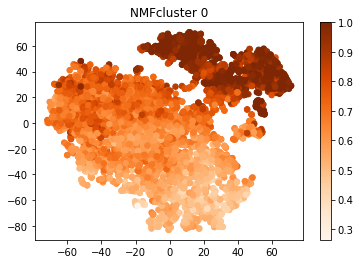

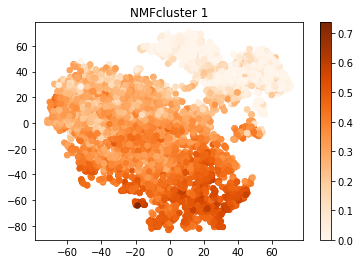

In [66]:
for i in range(0,2):
    points = plt.scatter(NMF_TSNE["x"], NMF_TSNE["y"], c=NMF_TSNE['NMFcluster%s' %str(i)], s=30, cmap="Oranges")
    plt.colorbar(points)
    plt.title('NMFcluster %i'%i )
    plt.show()

##### assign a hard label according to the membership score

In [67]:
scaled_W.reset_index(inplace = True)
scaled_W.drop("index", axis = 1, inplace = True)

scaled_W["NMFhardLabel"] = 0
for i in range(0,len(scaled_W)):
    if (scaled_W["NMFcluster0"][i] > 0.85):
        scaled_W["NMFhardLabel"][i] = 0
    else:
        scaled_W["NMFhardLabel"][i] = 1

In [68]:
df['class'].value_counts()

white    4898
red      1599
Name: class, dtype: int64

In [69]:
scaled_W['NMFhardLabel'].value_counts()

1    4958
0    1539
Name: NMFhardLabel, dtype: int64

In [70]:
pd.DataFrame(H.T, index = scaledX.columns, columns=['cluster 0', 'cluster 1'])

cluster 0  cluster 1
fixed acidity         45.082378  0.000000 
volatile acidity      45.187049  0.000000 
citric acid           34.200762  24.616721
residual sugar        25.816782  43.979363
chlorides             45.176650  0.000000 
free sulfur dioxide   24.146622  47.384294
total sulfur dioxide  22.350652  51.206760
density               37.407726  18.422282
pH                    44.587447  0.000000 
sulphates             45.335413  0.000000 
alcohol               43.157213  2.024392

####  Findings from NMF: 
   
As we can see from above, class 1 in NMF corresponds to the "white" class and class 0 corresponds to the "red" class. From NMF's point of view, class 1(white wine) has significant lower fixed acidity, volatile acidity, citric acid, chlorides, density, pH, sulphates and alcohol, and also significantly higher residual sugar, free sulfur dioxide, total sulfur dioxide than class 0(red wine). 



# Part 5. Post-Analysis Questions

### NMF with k = 2

In [71]:
cohesion_summary= df.copy()
summary.reset_index(inplace = True)
summary.drop("index", inplace = True, axis = 1)
summary["NMF"] = scaled_W['NMFhardLabel']

silhouette_avg = silhouette_score(scaledX, summary["NMF"])
print (silhouette_avg)

0.2667018557973039


NMF with k = 2 reported a average silhouette score of 0.2667018557973039, which is not great, showing that the NMF clustering might not have the best Cohesion and Separation.

In [72]:
sample_silhouette_values = silhouette_samples(scaledX, summary['NMF'])
cohesion_summary['sample_silhouette_values_NMF']= sample_silhouette_values

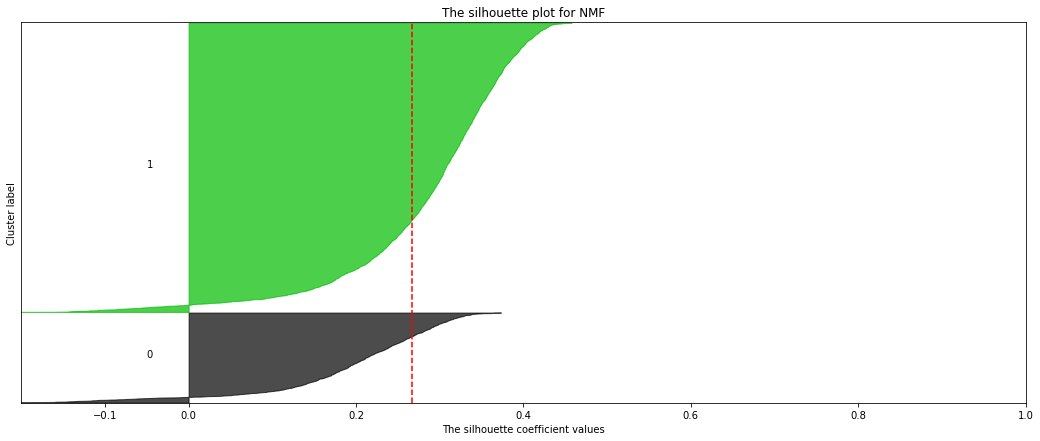

In [73]:
y_lower = 10
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    
n_clusters=len(np.unique(summary['NMF']))
ith_cluster_silhouette_values = cohesion_summary['sample_silhouette_values_NMF']

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)
# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.2, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
y_lower =10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[summary['NMF'] == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for NMF")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.show()

From the Silhouette plot, we can see that cluster 1 seems to have more separation and cohesion than cluster 2 as it has more points with silhouette score above the average. We can also see that both clusters have a fair amount of points with negative silhouette scores. These are the points with the worst separation and cohesion.


These points are:

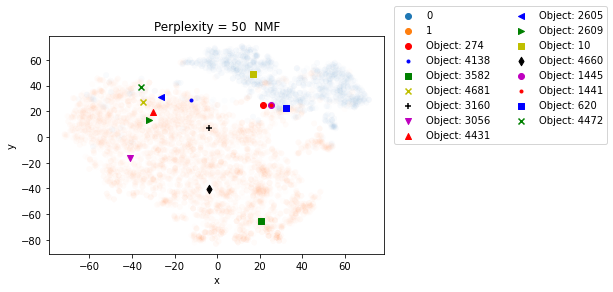

In [74]:
poor_ = cohesion_summary[cohesion_summary['sample_silhouette_values_NMF']<0]
rslt_df = poor_.sort_values(by = 'sample_silhouette_values_NMF') 
points_poor= rslt_df.index.tolist()

import itertools
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)
sns.scatterplot(x='x', y='y', hue= 'NMF', alpha= 0.01, data=dff)
plt.title('Perplexity = '+ str(50) + '  NMF' )

colors = itertools.cycle(["r", "b", "g", 'y', 'k', 'm'])
markers = itertools.cycle(['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd'])
for i in range(0,15):
        pos = points_poor[i]
        name = "Object: " + str(points_poor[i])
        plt.scatter(dff.iloc[pos]["x"], dff.iloc[pos]["y"], marker=next(markers), color=next(colors),label=name)
        plt.legend(loc= 'lower right', ncol= 2,bbox_to_anchor=(1.68, 0.48))
plt.show()

Most of the points with negative silhouette score are mis-classified points that are on the edge of the other cluster.

##### Most significant attributes of each clusters:
- cluster 0: objects in cluster 1 are highly associated with all attributes.
- cluster 1: citric acid, residual sugar, free sulfur dioxide, total sulfur dioxide, density.

##### Next, we are evaluating NMF class labels by looking at adjusted rand score, completeness score and homogeneity score.

In [75]:
adjusted_rand_score(summary['class'], summary['NMF'])

0.8223422628037398

In [76]:
from sklearn.metrics import completeness_score
completeness_score(summary['class'], summary['NMF'])

0.6997375370979294

In [77]:
from sklearn.metrics import homogeneity_score
homogeneity_score(summary['class'], summary['NMF'])

0.6864833092877002


NMF reported a high adjusted rand score, and a decent completeness score and homogeneity score. The reported adjusted rand score is quite close to 1, which means that the NMF class labels agree with the true label with a high percentage. It reported a completeness score of 0.7, which means most objects with the same true label were assigned to the same NMF class. Finally, the homogeneity score was 0.68, meaning that most objects in the same NMF classe have the same true label.


##### Now, we look at the TSNE plot color-coded with NMF labels and marker-styled with true label.

In [78]:
NMF_TSNE.reset_index(inplace = True)
NMF_TSNE.drop("index", inplace = True, axis = 1)
NMF_TSNE["NMFhardLabel"] = scaled_W['NMFhardLabel']

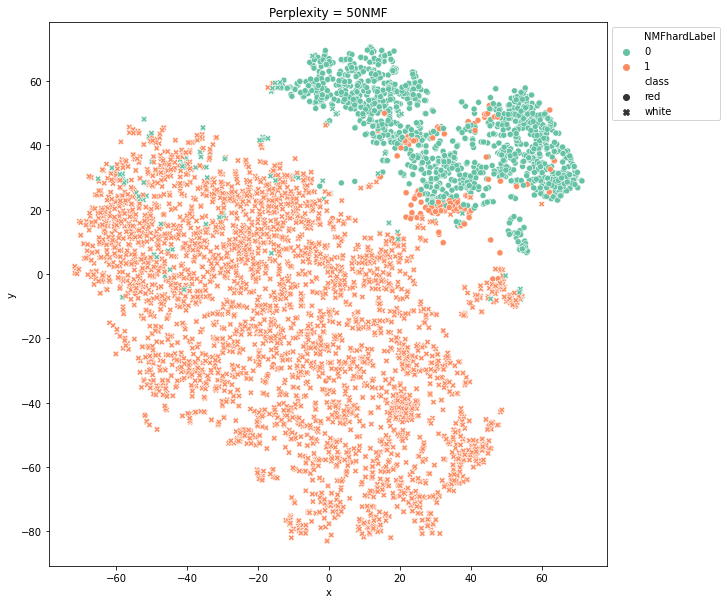

In [79]:
plt.subplots(figsize=(10, 10))

sns.scatterplot(x='x', y='y', style= 'class', palette=sns.color_palette("Set2", 2), hue= 'NMFhardLabel', data=NMF_TSNE)
plt.title('Perplexity = '+ str(50) + 'NMF' )
plt.legend(bbox_to_anchor=(1,1), ncol= 1)
plt.show()

The plot above corroborates the reported adjusted rand score, completeness score and homogeneity score. Most of the NMF labels agree with the true label, and the clusters are showing high level of completeness and homogeneity.

# Part.6 Analysis Summary 

Our research motivation was to understand and explore the individual characterisitcs of potential groups of wines as well as explore the chemical components that best describe the red and white wine. Given our motivation, we decided to use K-means and NMF algorithms to perform this analysis. At the end of it, the K-means algorithm worked better than NMF when categorizing the dataset. At first, when using K=4 for our K-means algorithm we were getting poor seperation and cohesion. So, to mitigate this, we changed the input into K=2. When we changed our K-value we were getting overall larger percentages in all categories when measuring cluster suitability. Additionally, we were recieving a higher silhouette coefficient value (K=4: 0.15, K=2: 0.17) indicating that K=2 offered more consistency. The following diagrams show the clusters when K=4 and K=2:


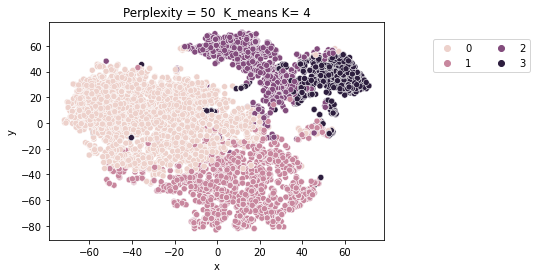

In [80]:
#TSNE Plot at K=4
kmeans=KMeans(n_clusters=4, random_state=1001).fit(scaledX)
summary['K_means4'] = kmeans.labels_
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue= 'K_means4', data=dff)
plt.title('Perplexity = '+ str(50) + '  K_means K= 4' )
plt.legend(loc= 'lower right', ncol= 2,bbox_to_anchor=(1.45, 0.75))
plt.show()

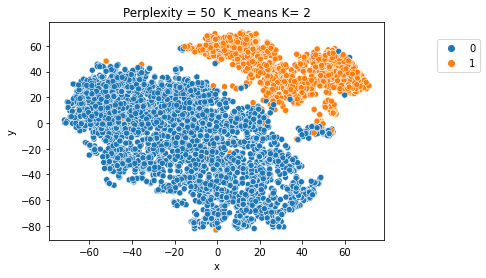

In [81]:
#TSNE Plot at K=2
kmeans=KMeans(n_clusters=2, random_state=1001).fit(scaledX)
summary['K_means2'] = kmeans.labels_
df_tsne = pd.DataFrame(data_tsne, columns=['x', 'y'], index=summary.index)
dff = pd.concat([summary, df_tsne], axis=1)

# Plot the projected (x,y) coordinates
sns.scatterplot(x='x', y='y', hue= 'K_means2', data=dff)
plt.title('Perplexity = '+ str(50) + '  K_means K= 2' )
plt.legend(loc= 'lower right', ncol= 1,bbox_to_anchor=(1.30, 0.75))
plt.show()


In terms of the NMF Algorithm, K=4 was not clearly defined as most clusters had relatively low membership scores. When seeing the elbow plot, there was little to no decipherable elbow. Because of the lack of information we were recieving, we tried K=2. Here we were recieving a higher silhouette score and concrete percentages for individual cluster suitability scores.

When comparing to the K-Means algorithm at K=2 to NMF algorithm at K=2, having a higher completeness score means that that most obejcts with the same true label were assigned with more accuracy. Having a higher homogeneity score tells us that more objects have the same true class label. Lastly, and arguably the most important metric, rand index for our K-means algorithm was closer to 1 compared to NMF. Chart below will more a more specific look at the individual values found by both algorithms

In [82]:
import pandas as pd
d = {"K-Means with K=2": ["Adjusted Rand Index", "Completeness Score", "Homogeneity Score"], 
    "Score": [0.94,0.87,0.88]}
e = {"Non-negative Matrix with K=2": ["Adjusted Rand Index", "Completeness Score", "Homogeneity Score"], 
    "Score": [0.82, 0.70, 0.68]}
scores = pd.DataFrame(data=d)
scores2 = pd.DataFrame(data=e)
combined = pd.concat([scores, scores2], axis=1)
combined

K-Means with K=2  Score Non-negative Matrix with K=2  Score
0  Adjusted Rand Index  0.94   Adjusted Rand Index          0.82 
1  Completeness Score   0.87   Completeness Score           0.70 
2  Homogeneity Score    0.88   Homogeneity Score            0.68

And so, for the K-means algorithm we are getting overall larger values in all categories. Having a higher completeness score means that that most obejcts with the same true label were assigned with more accuracy and having a higher homogeneity scores tells us that more objects have the same true class label. The most important metric being the rand index, where the K-means algo is closer to 1 compared to NMF . 

We were able to gain several insights from the algorithms we used. One of the most important being that there are underlying groups in the dataset. Using the NMF/K-means we are able to clearly see that out of the 2 clusters found by the algorithms we used each one had characteristics that defined them: 

In [83]:
#Percentages devised by NMF
pd.DataFrame(H.T, index = scaledX.columns, columns=['cluster 0', 'cluster 1'])
#RUN THIS

cluster 0  cluster 1
fixed acidity         45.082378  0.000000 
volatile acidity      45.187049  0.000000 
citric acid           34.200762  24.616721
residual sugar        25.816782  43.979363
chlorides             45.176650  0.000000 
free sulfur dioxide   24.146622  47.384294
total sulfur dioxide  22.350652  51.206760
density               37.407726  18.422282
pH                    44.587447  0.000000 
sulphates             45.335413  0.000000 
alcohol               43.157213  2.024392

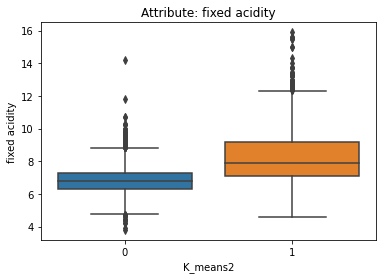

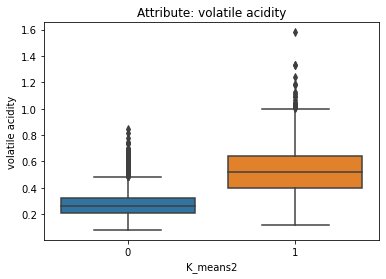

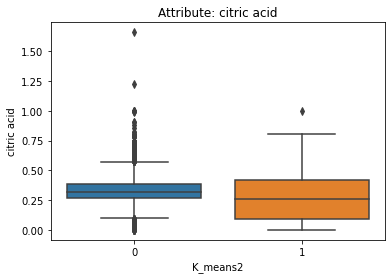

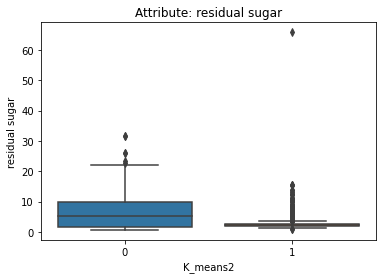

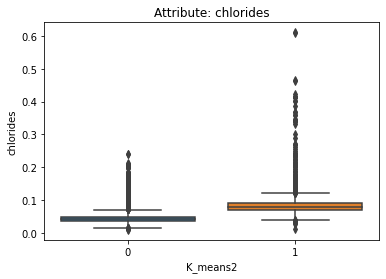

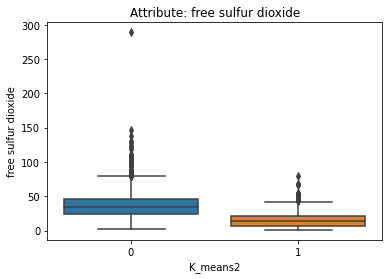

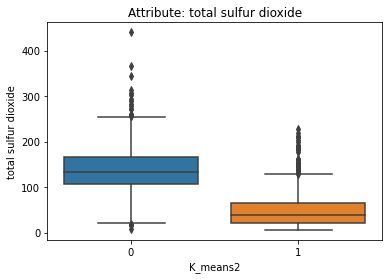

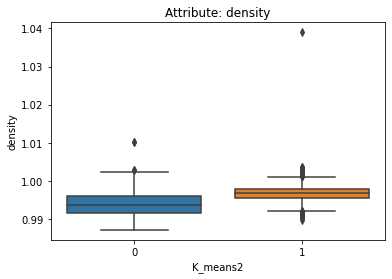

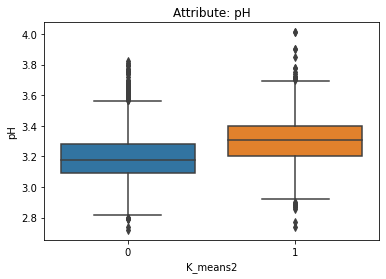

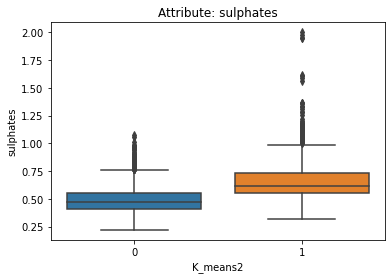

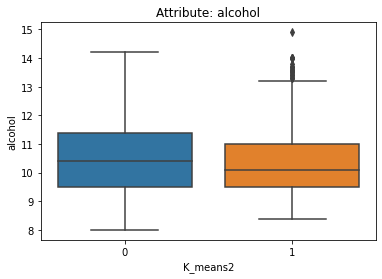

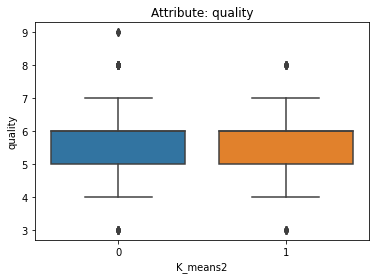

In [84]:
#Showing percentages through box plots using K-means 
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']:
  sns.boxplot(x='K_means2', y=col, data=summary)
  plt.title('Attribute: %s' %col)
  plt.ylabel(col)
  plt.show()

This box plot displays the amount of fixed acidity, volatile acidity, citric acid, residual sugar, chloride, free/total sulfur dioxide, etc relative to the red and white wine clusters. And so, as you can see, these algorithms directly tell us about the chemical components in each of these wines in addition to each individual percentage of ingredient that red wine and white white are both characteristic of. These directly show us the answers to our research motivation. 

## To conclude, we chose k-means to be our final algorithm, and here is our findings.

### We discovered a grouping with 4 underlying clusters of wine, and they are all with different characteristics:

**Cluster 0:**
- Highest concentration of residual sugar and both the free and the total sulfur dioxide.
- Lowest alcohol level.

**Cluster 1:**
- Highest quality wine and highest concentration of alcohol.
- Lowest density. 

**Cluster 2:**
- Highest pH and the highest concentration of fixed acidity, volatile acidity, chlorides, and sulphate.
- Lowest free and total sulfur dioxide.

**Cluster 3:**
- Characteristized by low density and low chlorides.

### We successfully identified the red/white wine clusters and here are their respective characteristics:

**Cluster 0(Red):**
- High "acidity" and "sulphate" concentration, low "total sulfur dioxide" and "free sulfur dioxide" concentration.


**Cluster 1(White):**
- High "residual sugar", low "sulphate", "pH", "density", "chlorides", and "acidity" concentration. 

Also,
- Cluster1 has slightly higher alcohol concentration than cluster 0.
- The quality between cluster 0 and cluster 1 is similar.
